Projekt
=======


Wprowadzenie
------------

Czyszczenie i porządkowanie danych
----------------------------------


In [190]:
import matplotlib.pyplot as plt
import missingno as msno
import pandas as pd
import seaborn as sns

In [191]:
df = pd.read_csv('data/silownia_new.csv')

In [192]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,NaN,Male,88.3,1.71,180,157,60,1.69,1313,Yoga,12.6,3.5,4,3,NaN
1,46.0,Female,74.9,1.53,179,151,66,1.30,883,NaN,33.9,2.1,4,2,32.00
2,32.0,Female,68.1,1.66,167,122,54,1.11,677,Cardio,33.4,2.3,4,2,NaN
3,25.0,Male,53.2,1.70,190,164,56,0.59,532,Strength,28.8,2.1,3,1,18.41
4,38.0,Male,46.1,1.79,188,158,68,0.64,556,Strength,29.2,2.8,3,1,14.39


In [193]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,873.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,823.000000
mean,38.626575,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.816549
std,12.273464,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.600485
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.105000
50%,39.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,23.940000
75%,50.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.450000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,47.720000


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            873 non-null    float64
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    int64  
 9   Workout_Type                   823 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [195]:
df.isna().sum()

Age                              100
Gender                             0
Weight (kg)                        0
Height (m)                         0
Max_BPM                            0
Avg_BPM                            0
Resting_BPM                        0
Session_Duration (hours)           0
Calories_Burned                    0
Workout_Type                     150
Fat_Percentage                     0
Water_Intake (liters)              0
Workout_Frequency (days/week)      0
Experience_Level                   0
BMI                              150
dtype: int64

<Axes: >

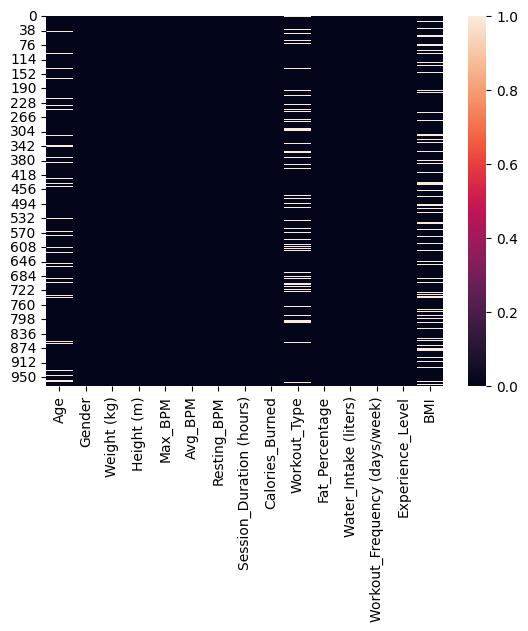

In [196]:
sns.heatmap(df.isna())

<Axes: >

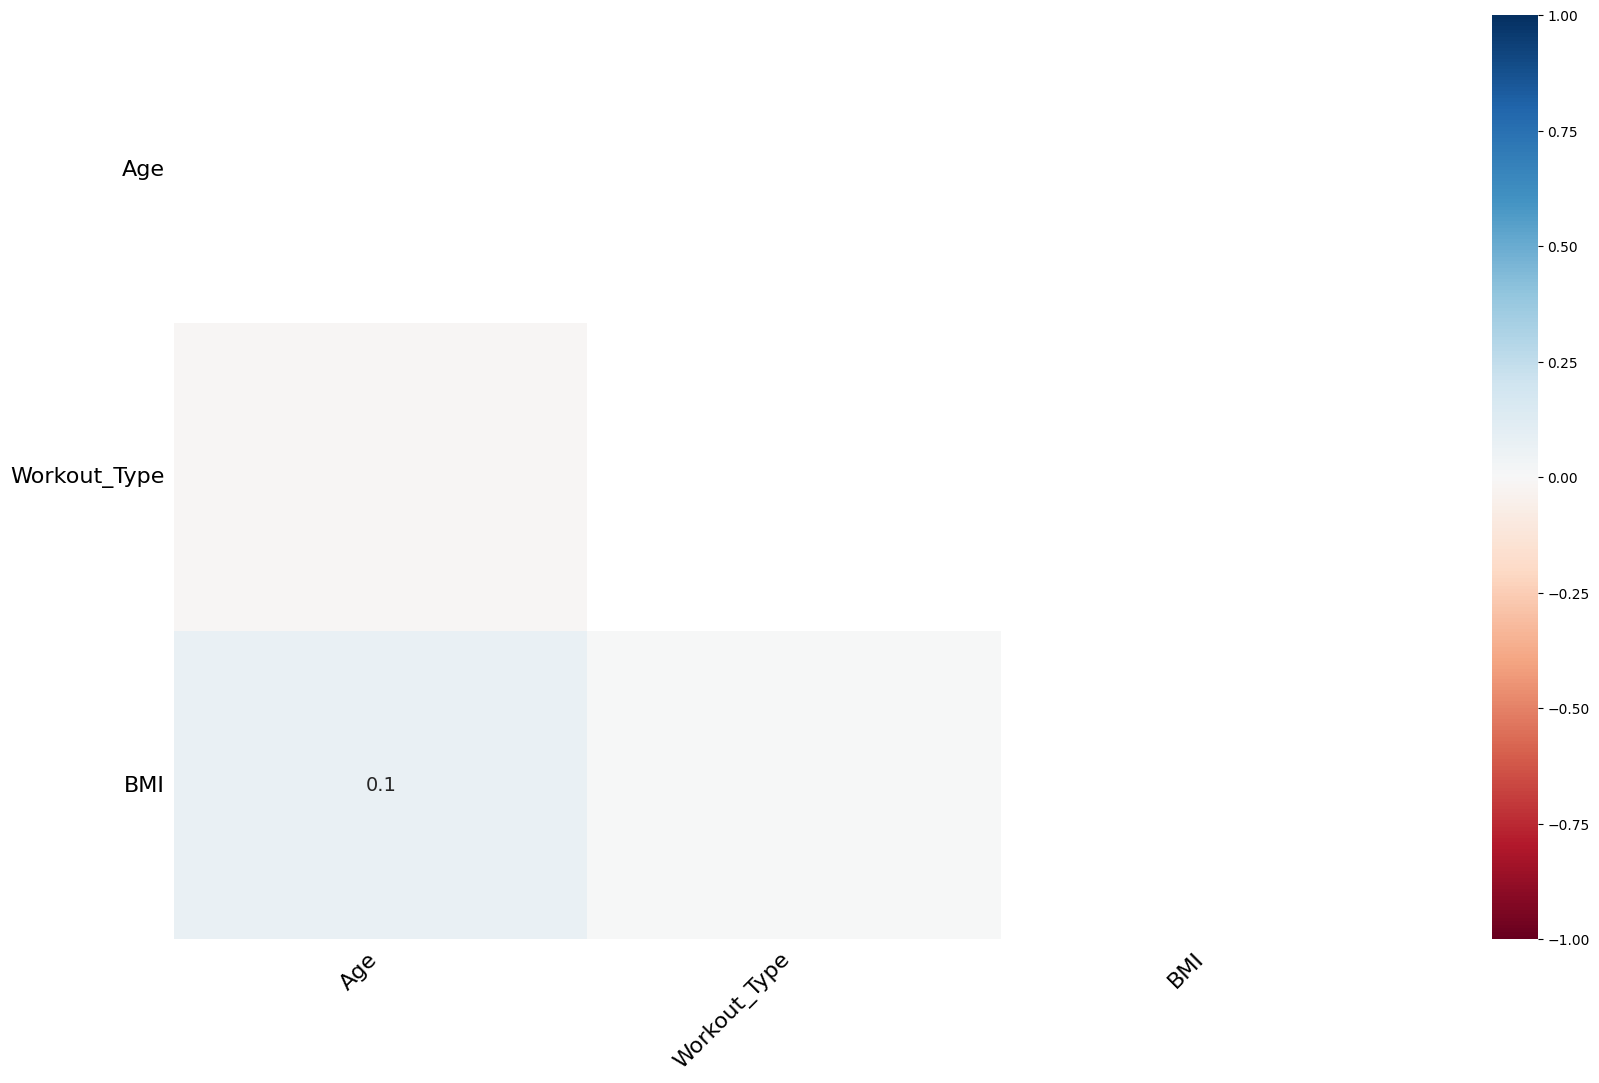

In [197]:
msno.heatmap(df)

<Axes: >

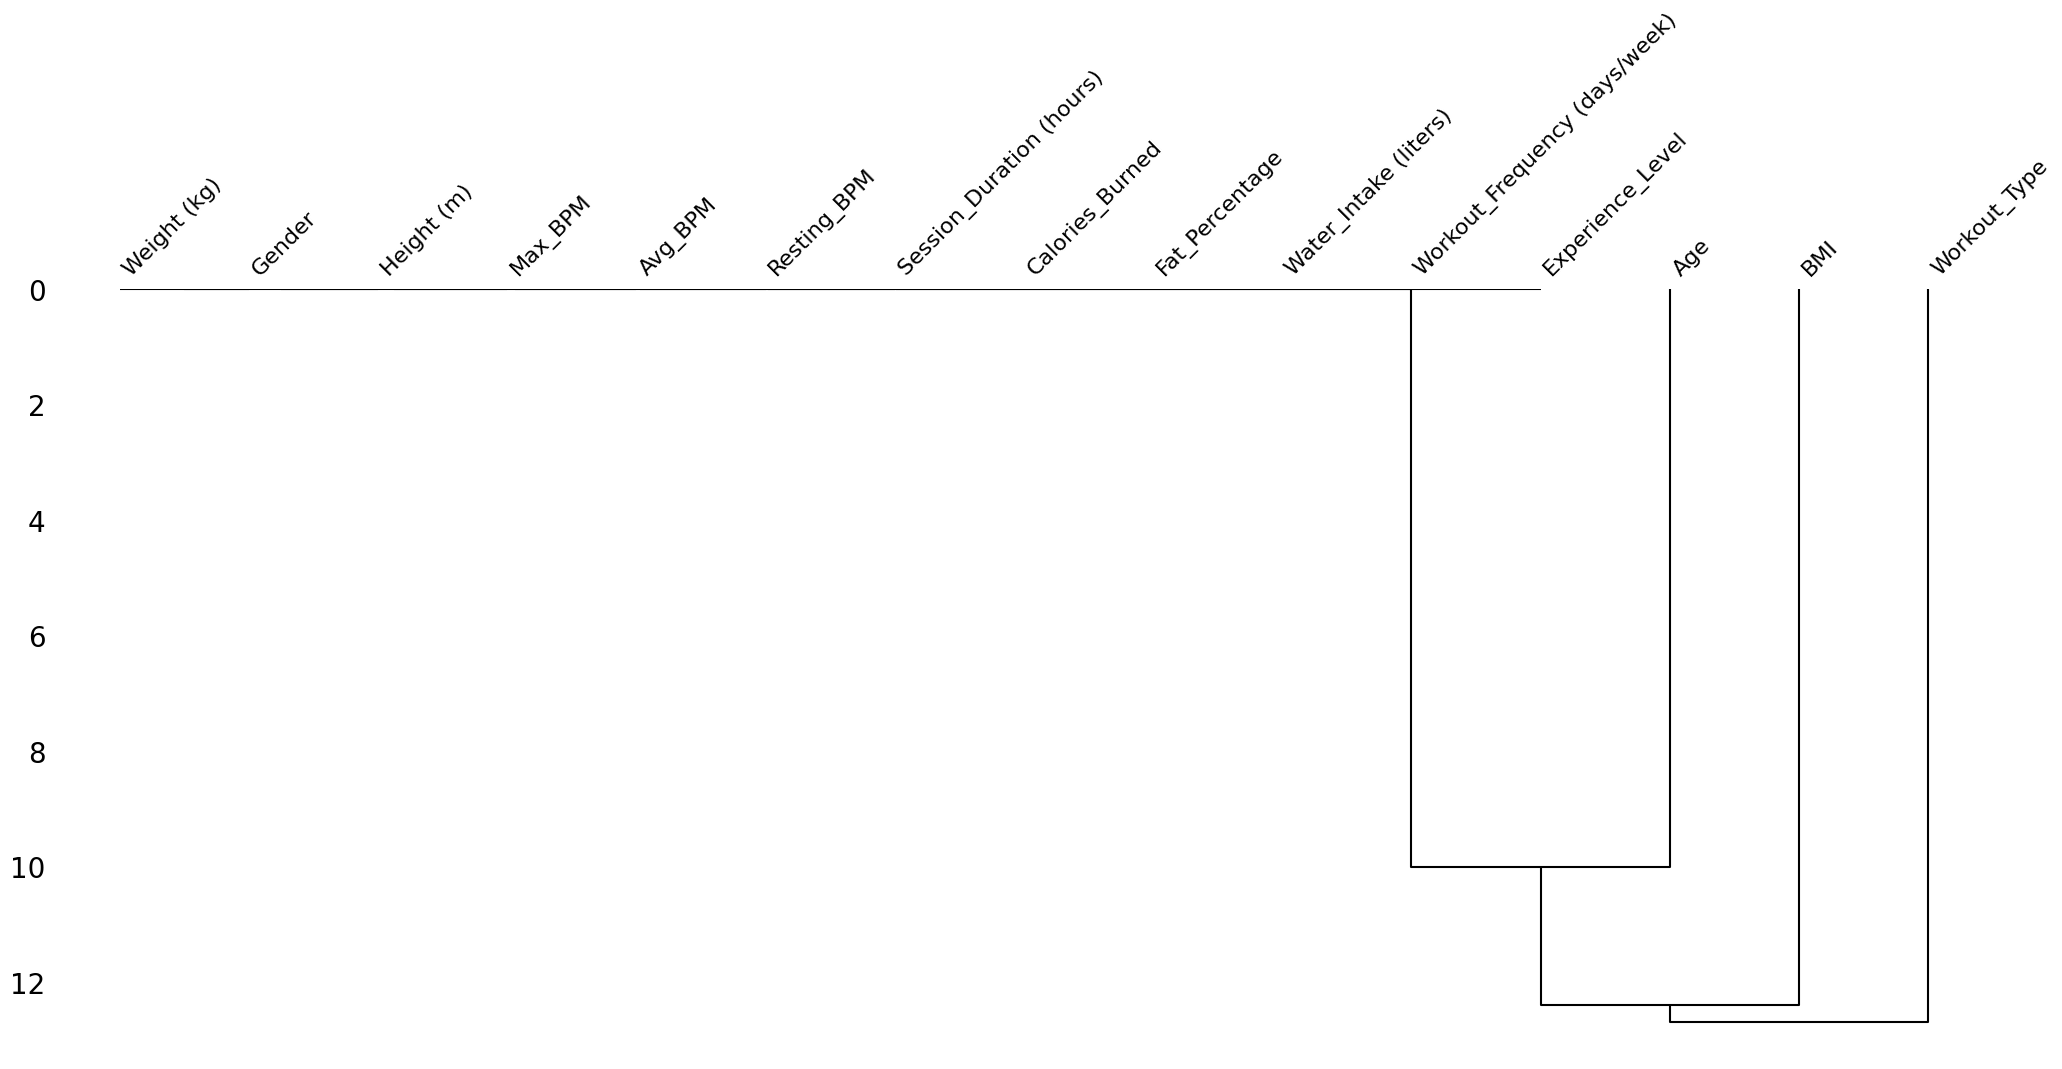

In [198]:
msno.dendrogram(df)

Brak zależności pomiędzy brakującymi danymi w tych samych wierszach

In [199]:
df.groupby('Gender')['Age'].apply(lambda x: x.isnull().sum())

Gender
Female    41
Male      59
Name: Age, dtype: int64

In [200]:
df.groupby('Gender')['BMI'].apply(lambda x: x.isnull().sum())

Gender
Female    67
Male      83
Name: BMI, dtype: int64

In [201]:
df[df['Age'].isna()]['Weight (kg)'].mean()

np.float64(75.01299999999999)

In [202]:
df[~df['Age'].isna()]['Weight (kg)'].mean()

np.float64(73.72199312714777)

Braki zupelnie losowe (MCAR), stanowią ok. 15%, więc nie będą usuwane, a imputowane

In [203]:
df['Age_imputed'] = df['Age'].fillna(df['Age'].mean())
df['BMI_imputed'] = df['BMI'].fillna(df['BMI'].mean())

In [204]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Workout_Type'], df['Gender'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi2 test p-value: {p}")

Chi2 test p-value: 0.5523515099225926


In [205]:
from scipy.stats import f_oneway

for col in df.select_dtypes(include='number').columns:
    groups = [group[col].dropna() for name, group in df.groupby('Workout_Type')]
    if len(groups) > 1:
        stat, p = f_oneway(*groups)
        print(f"{col}: p-value = {p:.4f}")


Age: p-value = 0.7154
Weight (kg): p-value = 0.6959
Height (m): p-value = 0.5577
Max_BPM: p-value = 0.7012
Avg_BPM: p-value = 0.8644
Resting_BPM: p-value = 0.6219
Session_Duration (hours): p-value = 0.1248
Calories_Burned: p-value = 0.2411
Fat_Percentage: p-value = 0.0824
Water_Intake (liters): p-value = 0.4088
Workout_Frequency (days/week): p-value = 0.4954
Experience_Level: p-value = 0.1320
BMI: p-value = 0.8890
Age_imputed: p-value = 0.7199
BMI_imputed: p-value = 0.8881


<Axes: >

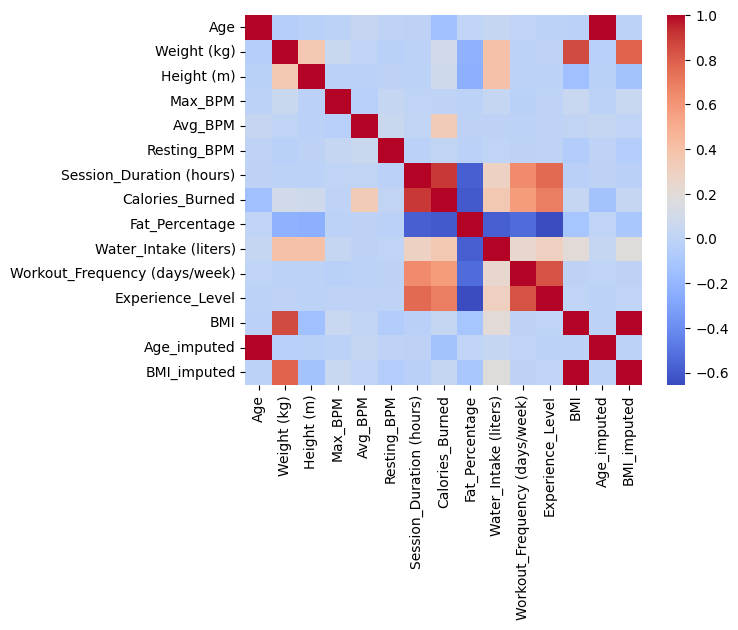

In [206]:
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')

Brak istotnych statystycznie zależności między Workout Type, a innymi kolumnami. Liczne braki, uzupelnienie najczęstszą wartością nie ma sensu, dlatego użyte zostanie oznaczenie "Unknown".

In [208]:
df['Workout_Type'] = df['Workout_Type'].fillna('Unknown')

In [210]:
df['Workout_Type'].value_counts()

Workout_Type
Cardio      220
Strength    219
Yoga        200
HIIT        184
Unknown     150
Name: count, dtype: int64

Wizualizacje
---

Analiza opisowa
---

Wnioski
---